In [204]:
import sys
import os
import pandas as pd
import xml.etree.ElementTree as ET

def session_queries():
    root = ET.parse('/Users/ekanou/Papers/stochasticsessionevaluation/code/1_sesh/scratch/2014/2014.xml').getroot()
    session_numq = dict()
    for session in list(root):
        num_q_sess = 0
        session_num = session.attrib['num']
        if int(session_num) > 87:
            continue
        for tag_under_session in list(session):
            if tag_under_session.tag == 'currentquery':
                num_q_sess += 1
            if tag_under_session.tag == 'interaction':
                interaction = tag_under_session
                interaction_num = interaction.attrib['num']
                for tag_under_interaction in list(interaction):
                    if tag_under_interaction.tag == 'query':
                        query = tag_under_interaction
                        query_text = query.text
                        num_q_sess += 1
        
        session_numq[session_num] = num_q_sess

    df = pd.DataFrame.from_dict(session_numq, orient='index')

    print('#sessions', df.count())
    print('#queries', df.sum())
    print('mean q per s', df.mean())
    print('std', df.std())
    print('median', df.median())

In [205]:
session_queries()

#sessions 0    87
dtype: int64
#queries 0    390
dtype: int64
mean q per s 0    4.482759
dtype: float64
std 0    1.981672
dtype: float64
median 0    4.0
dtype: float64


In [74]:
from os import listdir
from os.path import isfile, join
import pandas as pd
from collections import defaultdict
import numpy as np

def rel_session():
    path = '/Users/ekanou/Papers/stochasticsessionevaluation/code/9_data/runs/DD/2015/runs/'
    onlyfiles = []
    for f in listdir(path):
        if isfile(join(path, f)) and f != '.DS_Store':
            onlyfiles.append(f)
    print('Systems: ' + str(len(onlyfiles)))
    
    rel_session = defaultdict(lambda: defaultdict(int))
    doc_session = defaultdict(lambda: defaultdict(int))
    q_session = defaultdict(int)
    nql = []
    for filename in onlyfiles:
        previous_topic = ''
        previous_query = ''
        rank = -1
        nq = 0
        with open(join(path, filename), 'r') as file:
            for line in file:
                line = line + ' NULL'
                (topic, query, doc, score, rel, pas) = line.split(maxsplit=5)
                if int(query) > 9: continue #Just look into the first 10 queries in the session
                if topic != previous_topic or query != previous_query:
                    q_session[int(query)] = q_session[int(query)] + 1
                    rpos = -1
                    nq = nq + 1
                if topic != previous_topic:
                    previous_topic = topic
                if query != previous_query:
                    previous_query = query
                rpos = rpos + 1
                rel_session[int(query)][rpos] = rel_session[int(query)][rpos] + int(int(rel)>0)
                doc_session[int(query)][rpos] = doc_session[int(query)][rpos] + 1
            nql.append(nq/60)
    print(np.mean(nql))
    print(np.std(nql))
    print(np.median(nql))
    df_rel = pd.DataFrame(rel_session)
    df_doc = pd.DataFrame(doc_session)
    df_q = pd.DataFrame(q_session, index=[0])
    return(df_rel, df_doc, df_q)        

In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(data, square=True, linewidths=.5,
            annot=True, fmt='.2g', annot_kws={"size": 7}, cbar=False)
    plt.xlabel('Query index in session')
    plt.ylabel('Rank')
    sns.set(font_scale=.6)
    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Systems: 22
11.196969697
6.67547455349
10.8916666667
      0     1     2     3     4     5     6     7     8     9
0  2242  2030  1591  1418  1361  1312  1257  1225  1188  1156
     0    1    2    3    4    5    6    7   8   9
0  632  478  298  222  197  169  141  120  92  73
1  539  460  291  204  176  151  110  111  91  75
2  525  434  287  207  166  147  100  109  76  79
3  432  394  242  192  165  147  112   86  88  85
4  397  342  222  177  141  123   99   88  80  72
      0     1     2     3     4     5     6     7     8     9
0  2242  2030  1591  1418  1361  1312  1257  1225  1188  1156
1  2242  2030  1591  1418  1361  1312  1256  1224  1188  1156
2  2242  2030  1591  1418  1361  1312  1256  1224  1188  1156
3  2241  2030  1585  1418  1361  1312  1256  1224  1186  1156
4  2241  2030  1573  1418  1361  1312  1255  1216  1185  1153


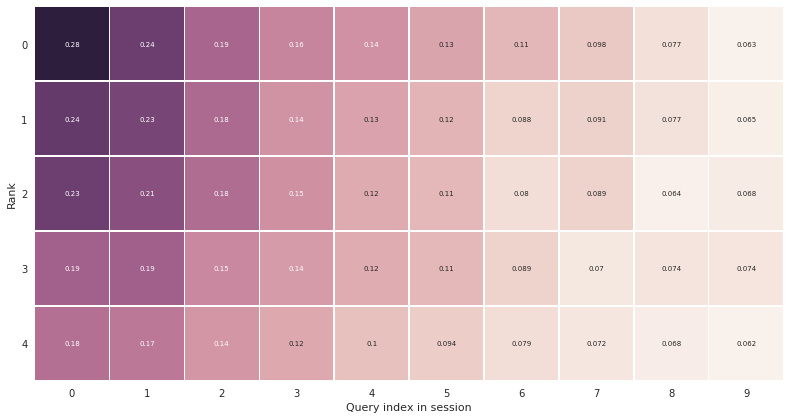

10444


In [84]:
def main():
    sns.set(color_codes=False)
    #session_queries()
    (df_rel, df_doc, df_q) = rel_session()
    print(df_q)
    print(df_rel)
    print(df_doc)
    rel_q = df_rel.values / df_q.values[:,None]
    
    #plot_heatmap(df_rel.values)
    relative = df_rel/df_doc
    plot_heatmap(relative)

    #plot_heatmap(rel_q)
    
    y = np.array(df_q.values[0])
    x = np.arange(1, len(y)+1)
    #sns.barplot(x,y)
    
    y=np.sum(rel_q[0],0)/5
    sns.barplot(x,y)
    print(sum(sum(df_rel.values)))

if __name__ == "__main__":
    main()

In [85]:
a = set([1,5,8,2,0])
sum(a)

16

In [86]:
a={'a':10,'b':20}
for k in a:
    print(a[k])

10
20
